# 수치입력 수치 예측 모델 레시피
수치를 입력하여 수치를 예측하는 모델<br>
수치 예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습해보겠다.<br><br>
### 1. 데이터셋 준비
입력 x에 대해 2를 곱해 두 배 값을 갖는 출력 y가 되도록 데이터셋을 생성해보았다.<br>
선형회귀 모델을 사용한다면 **Y = w x X +b** 일 때, w가 2에 가깝고 b가 0.16가 가깝게 되도록 학습시키는 것이 목표다.

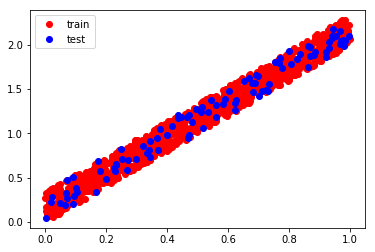

In [1]:
import numpy as np

#데이터셋 생성
x_train = np.random.random((1000, 1)) # 1000 x 1 행렬 생성
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0

x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

#데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train,y_train,'ro')
plt.plot(x_test,y_test,'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 레이어 준비
p.181 사진 참고<br>

1. input data, Labels : 1차원의 입력 데이터 및 라벨
2. Dense : 모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층
3. relu : 활성화 함수로 주로 은닉층에 사용

# 3. 모델 준비
수치 예측을 하기 위해 **선형회귀 모델**, **퍼셉트론 신경망 모델**, **다층퍼셉트론 신경망 모델**, **깊은 다층퍼셉트론 신경망 모델** 준비한다.<br>

- 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치 예측을 해보겠다.<br>
아래 식에서 x,y는 우리가 만든 데이터셋이고 회귀분석을 통하여 w와 b 값을 구하는 것이 목표이다.<br>

    Y = w x X +b
    
w와 b값을 구하게 되면, 임의의 입력 x에 대하여 출력 y가 나오는데 이것이 **예측값**이다.<br>
w,b 값은 **분산(np.var)**, **공분산(np.cov)**, **평균(np.average)**(확률과 통계 식 참고)을 이용하여 쉽게 구할 수 있다.<br>

    w = np.cov(X,Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식처럼 보이지만 이 수식을 도출하기는 꽤나 복잡한다.<br>
오차를 최소화하는 극댓값을 구하기 위해 편미분을 수행하고 다시 식을 전개하는 등의 과정이 필요하다.(p.182 참고)<br>
<br>

- 퍼셉트론 신경망 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 신경망 모델이다.<br>
즉 weight(w), bias(b) 하나로 전형적인 **Y = w x X +b**를 풀기 위한 모델이다.<br>
수치 예측을 하기 위해서는 출력 레이어에 별도의 활성화 함수를 사용하지 않는다.<br>
w,b 값이 손으로 푼 선형회귀 최적 해에 근접할려면 경우에 따라 만 번 이상의 에포크가 필요하다.<br>
실제로 사용하지 않는 모델이지만 선형회귀부터 공부하는 사람에게는 입문 모델로 나쁘지 않다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
 
<br>

- 다층퍼셉트론 신경망 모델

Dense 레이어가 두 개인 다층퍼셉트론 신경망 모델이다.<br>
첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류 역전파가 용이한 relu 활성화 함수를 사용하였다.<br>
출력 레이어인 두 번째 레이어는 하나의 수치값을 예측하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았다.<br>

    model = Sequential()
    model.add(Dense(64, input_dim=1))
    model.add(Dense(1))
<br>

- 깊은 다층퍼셉트론 신경망 모델

Dense 레이어가 총 3개인 다층퍼셉트론 신경망 모델이다.<br>
첫 번째, 두번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류 역전파가 용이한 relu 활성화 함수를 사용하였다.<br>
출력 레이어인 세 번째 레이어는 하나의 수치값을 예측하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았다.<br>

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

# 4. 전체소스

In [3]:
# 선형회귀 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))


2.0095642457689924 0.489810668231933
mse : 0.07616269072869448


Using TensorFlow backend.









Epoch 1/50





1000/1000 [==============================] - 0s 445us/step - loss: 0.3008
Epoch 2/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.2717
Epoch 3/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.2479
Epoch 4/50
1000/1000 [==============================] - 0s 14us/step - loss: 0.2258
Epoch 5/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.2050
Epoch 6/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.1854
Epoch 7/50
1000/1000 [==============================] - 0s 15us/step - loss: 0.1669
Epoch 8/50
1000/1000 [==============================] - 0s 14us/step - loss: 0.1495
Epoch 9/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.1331
Epoch 10/50
1000/1000 [==============================] - 0s 11us/step - loss: 0.1181
Epoch 11/50
1000/1000 [==============================] - 0s 17us/step - loss: 0.1042
Epoch 12/50
1000/1000 [==============================] - 0s 1

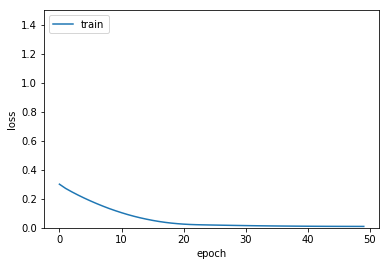

100/100 [==============================] - 0s 198us/step
loss : 0.008129756823182106


In [4]:
# 퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

Epoch 1/50
1000/1000 [==============================] - 0s 119us/step - loss: 1.0278
Epoch 2/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.6345
Epoch 3/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.3841
Epoch 4/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.2078
Epoch 5/50
1000/1000 [==============================] - 0s 14us/step - loss: 0.1017
Epoch 6/50
1000/1000 [==============================] - 0s 14us/step - loss: 0.0549
Epoch 7/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.0407
Epoch 8/50
1000/1000 [==============================] - 0s 14us/step - loss: 0.0311
Epoch 9/50
1000/1000 [==============================] - 0s 15us/step - loss: 0.0222
Epoch 10/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.0156
Epoch 11/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.0117
Epoch 12/50
1000/1000 [==============================] - 0s 14us/step - l

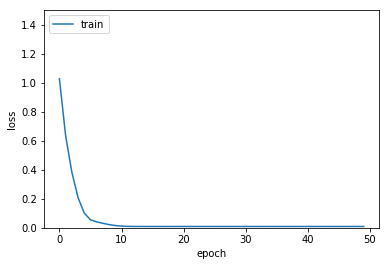

100/100 [==============================] - 0s 404us/step
loss : 0.008546405136585236


In [5]:
# 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))


Epoch 1/50
1000/1000 [==============================] - 0s 138us/step - loss: 0.9337
Epoch 2/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.2722
Epoch 3/50
1000/1000 [==============================] - 0s 19us/step - loss: 0.0524
Epoch 4/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.0275
Epoch 5/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.0184
Epoch 6/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.0122
Epoch 7/50
1000/1000 [==============================] - 0s 12us/step - loss: 0.0100
Epoch 8/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.0097
Epoch 9/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.0100
Epoch 10/50
1000/1000 [==============================] - 0s 15us/step - loss: 0.0098
Epoch 11/50
1000/1000 [==============================] - 0s 13us/step - loss: 0.0097
Epoch 12/50
1000/1000 [==============================] - 0s 14us/step - l

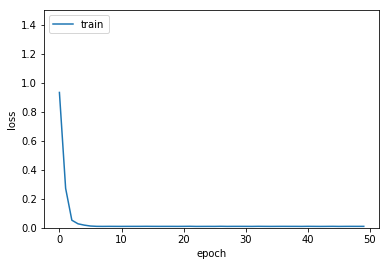

100/100 [==============================] - 0s 334us/step
loss : 0.010828750915825367


In [6]:
# 깊은 다층퍼셉트론 신경망 모델

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))


퍼셉트론 > 다층 퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀더 빨리 되는 것을 확인할 수 있다.